<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo39/blob/main/Reto_E2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reto-> Entrega 1 (16/11) -> Limpieza, análisis, visualización y kmeans

*   Ciencia y analítica de datos (TC4029.10)
*   JUAN FELIPE TORO SALGADO --- MATRICULA: A01794247
*   ALEJANDRA ISLAS ------MATRICULA:A01794452
*   PROFESOR:Dra. María de la Paz Rico Fernández


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('/content/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv',encoding = "ISO-8859-1")
print(df.shape)
df.head()

(1068, 57)


,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


# Limpieza de base de datos.

In [3]:
df.isnull().values.any()

True

In [4]:
df.isnull().any()

CLAVE                   False
SITIO                   False
ORGANISMO_DE_CUENCA     False
ESTADO                  False
MUNICIPIO               False
ACUIFERO                False
SUBTIPO                 False
LONGITUD                False
LATITUD                 False
PERIODO                 False
ALC_mg/L                 True
CALIDAD_ALC              True
CONDUCT_mS/cm            True
CALIDAD_CONDUC           True
SDT_mg/L                 True
SDT_M_mg/L               True
CALIDAD_SDT_ra           True
CALIDAD_SDT_salin        True
FLUORUROS_mg/L          False
CALIDAD_FLUO            False
DUR_mg/L                 True
CALIDAD_DUR              True
COLI_FEC_NMP/100_mL     False
CALIDAD_COLI_FEC        False
N_NO3_mg/L               True
CALIDAD_N_NO3            True
AS_TOT_mg/L             False
CALIDAD_AS              False
CD_TOT_mg/L             False
CALIDAD_CD              False
CR_TOT_mg/L             False
CALIDAD_CR              False
HG_TOT_mg/L             False
CALIDAD_HG

In [5]:
# media par arremplazar valor CONDUCT_mS/cm
meanCONDUCT_mS = df["CONDUCT_mS/cm"].mean()
print(meanCONDUCT_mS)

# moda para  reemplazar valor CALIDAD_CONDUC
modeCALIDAD_CONDUC= df["CALIDAD_CONDUC"].mode()
print(modeCALIDAD_CONDUC)
# media para reemplazar ALC_mg/L
meanALC_mg = df["ALC_mg/L"].mean()
print(meanALC_mg)
#  moda para  reemplazar valor CALIDAD_ALC
modeCALIDAD_ALC= df["CALIDAD_ALC"].mode()
print(modeCALIDAD_ALC)

ndf=df


1138.9530131826743
0    Permisible para riego
dtype: object
235.63375939849624
0    Alta
dtype: object


In [6]:
# Remplazo de valores 
ndf["CONDUCT_mS/cm"].replace(np.nan,meanCONDUCT_mS, inplace=True)
ndf["CALIDAD_CONDUC"].replace(np.nan, "Permisible para riego", inplace=True)
ndf["ALC_mg/L"].replace(np.nan,meanALC_mg , inplace=True)
ndf["CALIDAD_ALC"].replace(np.nan, "Alta", inplace=True)
ndf.dropna(subset=["DUR_mg/L", "CALIDAD_DUR", "N_NO3_mg/L", "SDT_M_mg/L", "CALIDAD_SDT_ra", "CALIDAD_SDT_salin"], axis=0, inplace=True)


In [7]:
# Remplazo de valores 
df.replace("NA",np.nan,inplace=True) # remplaza los  datos NA  por NaN
df.replace("Missing",np.nan,inplace=True)#remplaza los  datos perdidos  por NaN
ndf=df
ndf['SDT_M_mg/L'].replace('<25', 25, inplace=True)
ndf['FLUORUROS_mg/L'].replace('<0.2', 0.2, inplace=True)
ndf['DUR_mg/L'].replace('<20', 20, inplace=True)
ndf['COLI_FEC_NMP/100_mL'].replace('<1.1', 1.1, inplace=True)
ndf['N_NO3_mg/L'].replace('<0.02', 0.02, inplace=True)
ndf['AS_TOT_mg/L'].replace('<0.01', 0.01, inplace=True)
ndf['CD_TOT_mg/L'].replace('<0.003', 0.003, inplace=True)
ndf['CR_TOT_mg/L'].replace('<0.005', 0.005, inplace=True)
ndf['HG_TOT_mg/L'].replace('<0.0005', 0.0005, inplace=True)
ndf['PB_TOT_mg/L'].replace('<0.005', 0.005, inplace=True)
ndf['MN_TOT_mg/L'].replace('<0.0015', 0.0015, inplace=True)
ndf['FE_TOT_mg/L'].replace('<0.025', 0.025, inplace=True)
ndf.columns
 
ndf.drop(['SDT_mg/L'], axis = 'columns', inplace=True)

In [8]:
ndf.isnull().any()

CLAVE                   False
SITIO                   False
ORGANISMO_DE_CUENCA     False
ESTADO                  False
MUNICIPIO               False
ACUIFERO                False
SUBTIPO                 False
LONGITUD                False
LATITUD                 False
PERIODO                 False
ALC_mg/L                False
CALIDAD_ALC             False
CONDUCT_mS/cm           False
CALIDAD_CONDUC          False
SDT_M_mg/L              False
CALIDAD_SDT_ra          False
CALIDAD_SDT_salin       False
FLUORUROS_mg/L          False
CALIDAD_FLUO            False
DUR_mg/L                False
CALIDAD_DUR             False
COLI_FEC_NMP/100_mL     False
CALIDAD_COLI_FEC        False
N_NO3_mg/L              False
CALIDAD_N_NO3           False
AS_TOT_mg/L             False
CALIDAD_AS              False
CD_TOT_mg/L             False
CALIDAD_CD              False
CR_TOT_mg/L             False
CALIDAD_CR              False
HG_TOT_mg/L             False
CALIDAD_HG              False
PB_TOT_mg/

In [9]:

ndf[['SDT_M_mg/L', 'FLUORUROS_mg/L', 'DUR_mg/L', 'COLI_FEC_NMP/100_mL', 'N_NO3_mg/L',
     'AS_TOT_mg/L','CD_TOT_mg/L', 'CR_TOT_mg/L', 'HG_TOT_mg/L', 'PB_TOT_mg/L', 'MN_TOT_mg/L',
     'FE_TOT_mg/L']] = ndf[['SDT_M_mg/L', 'FLUORUROS_mg/L', 'DUR_mg/L', 'COLI_FEC_NMP/100_mL',
                            'N_NO3_mg/L', 'AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L', 'HG_TOT_mg/L',
                            'PB_TOT_mg/L', 'MN_TOT_mg/L', 'FE_TOT_mg/L']] .astype("float")



In [10]:
ndf.dtypes


CLAVE                    object
SITIO                    object
ORGANISMO_DE_CUENCA      object
ESTADO                   object
MUNICIPIO                object
ACUIFERO                 object
SUBTIPO                  object
LONGITUD                float64
LATITUD                 float64
PERIODO                   int64
ALC_mg/L                float64
CALIDAD_ALC              object
CONDUCT_mS/cm           float64
CALIDAD_CONDUC           object
SDT_M_mg/L              float64
CALIDAD_SDT_ra           object
CALIDAD_SDT_salin        object
FLUORUROS_mg/L          float64
CALIDAD_FLUO             object
DUR_mg/L                float64
CALIDAD_DUR              object
COLI_FEC_NMP/100_mL     float64
CALIDAD_COLI_FEC         object
N_NO3_mg/L              float64
CALIDAD_N_NO3            object
AS_TOT_mg/L             float64
CALIDAD_AS               object
CD_TOT_mg/L             float64
CALIDAD_CD               object
CR_TOT_mg/L             float64
CALIDAD_CR               object
HG_TOT_m

In [11]:
ndf.columns

Index(['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
       'ACUIFERO', 'SUBTIPO', 'LONGITUD', 'LATITUD', 'PERIODO', 'ALC_mg/L',
       'CALIDAD_ALC', 'CONDUCT_mS/cm', 'CALIDAD_CONDUC', 'SDT_M_mg/L',
       'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin', 'FLUORUROS_mg/L', 'CALIDAD_FLUO',
       'DUR_mg/L', 'CALIDAD_DUR', 'COLI_FEC_NMP/100_mL', 'CALIDAD_COLI_FEC',
       'N_NO3_mg/L', 'CALIDAD_N_NO3', 'AS_TOT_mg/L', 'CALIDAD_AS',
       'CD_TOT_mg/L', 'CALIDAD_CD', 'CR_TOT_mg/L', 'CALIDAD_CR', 'HG_TOT_mg/L',
       'CALIDAD_HG', 'PB_TOT_mg/L', 'CALIDAD_PB', 'MN_TOT_mg/L', 'CALIDAD_MN',
       'FE_TOT_mg/L', 'CALIDAD_FE', 'SEMAFORO', 'CONTAMINANTES',
       'CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra',
       'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR',
       'CUMPLE_CON_CF', 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD',
       'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN',
       'CUMPLE_CON_FE'],
      dtype='object')

In [12]:
nudf=ndf[['LONGITUD','LATITUD','ALC_mg/L','CONDUCT_mS/cm','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL'
,'N_NO3_mg/L','AS_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L',
        'PB_TOT_mg/L', 'MN_TOT_mg/L','FE_TOT_mg/L'] ]
        

In [13]:
nudf.describe()

,LONGITUD,LATITUD,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
count,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000
mean,-101.888948,23.169131,235.908849,1140.533664,897.079953,1.078534,348.368523,356.667763,4.312367,0.019654,0.013289,0.000557,0.005283,0.072713,0.410883
std,6.713487,3.888265,116.765811,1243.926518,2754.019397,1.927288,360.019564,2056.221592,8.347838,0.035271,0.154681,0.000468,0.003260,0.377200,5.548345
min,-116.664250,14.561150,26.640000,50.400000,25.000000,0.200000,20.000000,1.100000,0.020000,0.010000,0.005000,0.000500,0.005000,0.001500,0.025000
25%,-105.394575,20.221577,164.203750,506.000000,337.700000,0.268900,121.274100,1.100000,0.646229,0.010000,0.005000,0.000500,0.005000,0.001500,0.025000
50%,-102.173075,22.617190,216.450000,824.000000,551.400000,0.505450,245.662350,1.100000,2.080766,0.010000,0.005000,0.000500,0.005000,0.001500,0.046900
75%,-98.974716,25.510285,292.710000,1322.250000,917.000000,1.140800,454.139700,11.000000,5.200047,0.010000,0.005000,0.000500,0.005000,0.009947,0.170825
max,-86.864120,32.677713,1650.000000,18577.000000,82170.000000,34.803300,3810.692200,24196.000000,121.007813,0.452200,5.003200,0.014150,0.080900,8.982000,178.615000


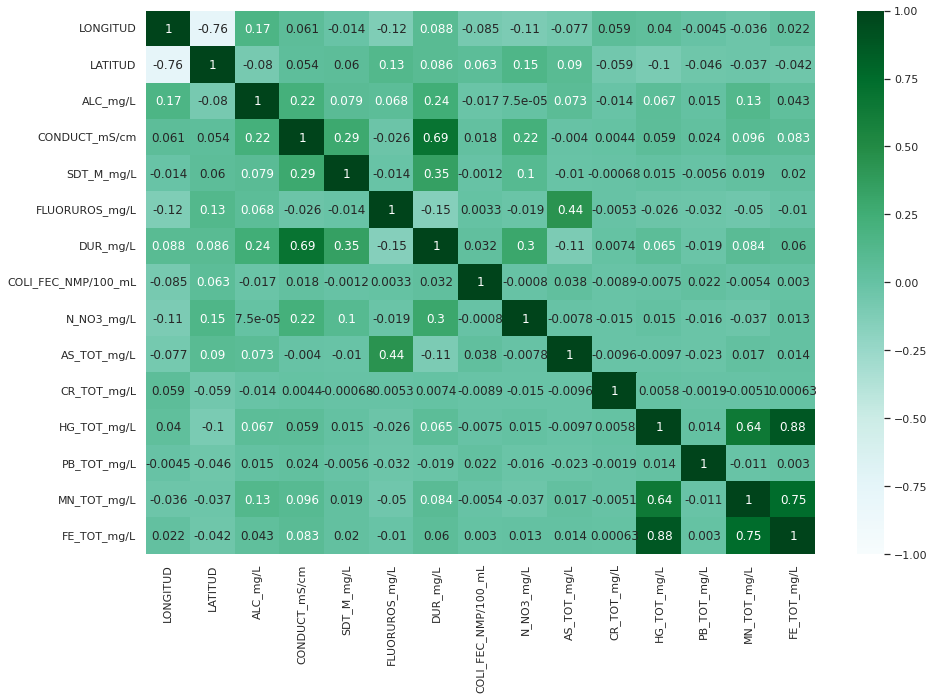

In [14]:

corrs=nudf.corr()
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(corrs, vmin=-1, cmap="BuGn", annot=True)

# Explorar cada datos  e identificacion
1. Identificando tendencias centrales promedio, media y mediana de los datos.
2. Identificar medidas de dispersión, máximo, mínimo .
3. Identificar medidas de posición no centrales , los cuartiles , outliers.
4. Identificar correlaciones
5. Preparar los datos

In [15]:
nudf.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
LONGITUD,1064.0,-101.888948,6.713487,-116.66425,-105.394575,-102.173075,-98.974716,-86.864120
LATITUD,1064.0,23.169131,3.888265,14.56115,20.221577,22.617190,25.510285,32.677713
ALC_mg/L,1064.0,235.908849,116.765811,26.64000,164.203750,216.450000,292.710000,1650.000000
CONDUCT_mS/cm,1064.0,1140.533664,1243.926518,50.40000,506.000000,824.000000,1322.250000,18577.000000
SDT_M_mg/L,1064.0,897.079953,2754.019397,25.00000,337.700000,551.400000,917.000000,82170.000000
FLUORUROS_mg/L,1064.0,1.078534,1.927288,0.20000,0.268900,0.505450,1.140800,34.803300
DUR_mg/L,1064.0,348.368523,360.019564,20.00000,121.274100,245.662350,454.139700,3810.692200
COLI_FEC_NMP/100_mL,1064.0,356.667763,2056.221592,1.10000,1.100000,1.100000,11.000000,24196.000000
N_NO3_mg/L,1064.0,4.312367,8.347838,0.02000,0.646229,2.080766,5.200047,121.007813
AS_TOT_mg/L,1064.0,0.019654,0.035271,0.01000,0.010000,0.010000,0.010000,0.452200


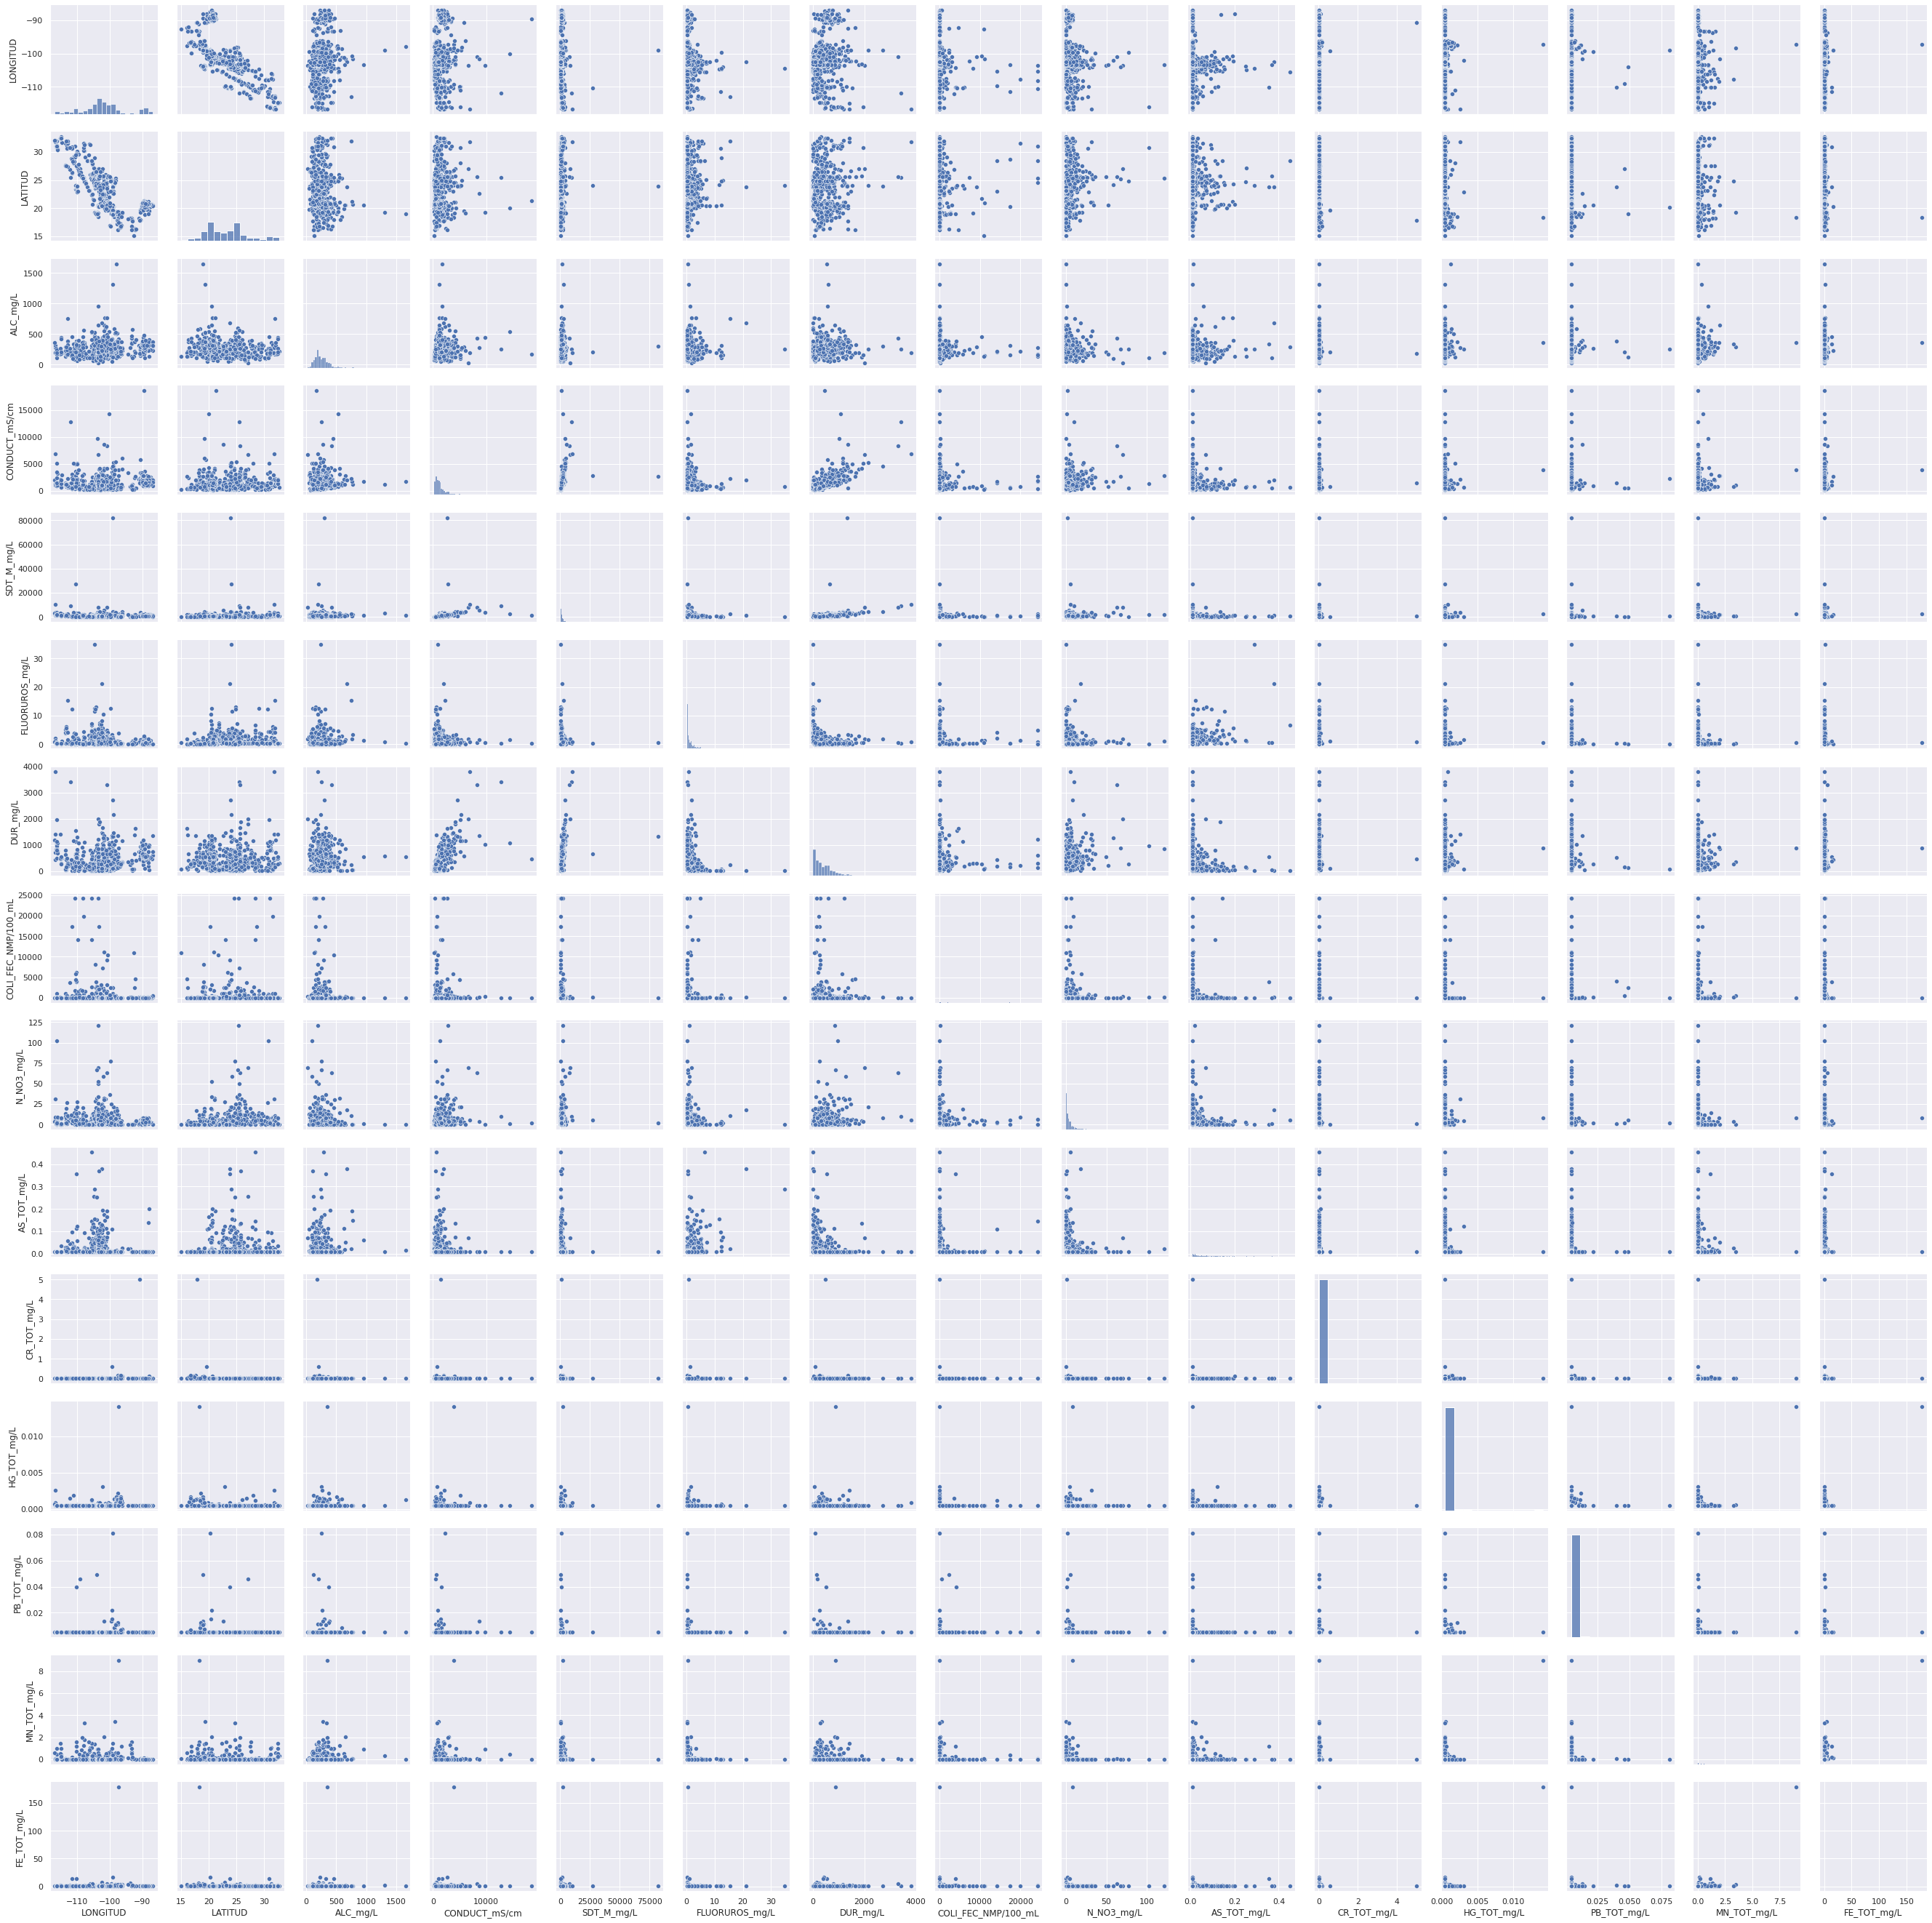

In [ ]:
g = sns.PairGrid(nudf)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

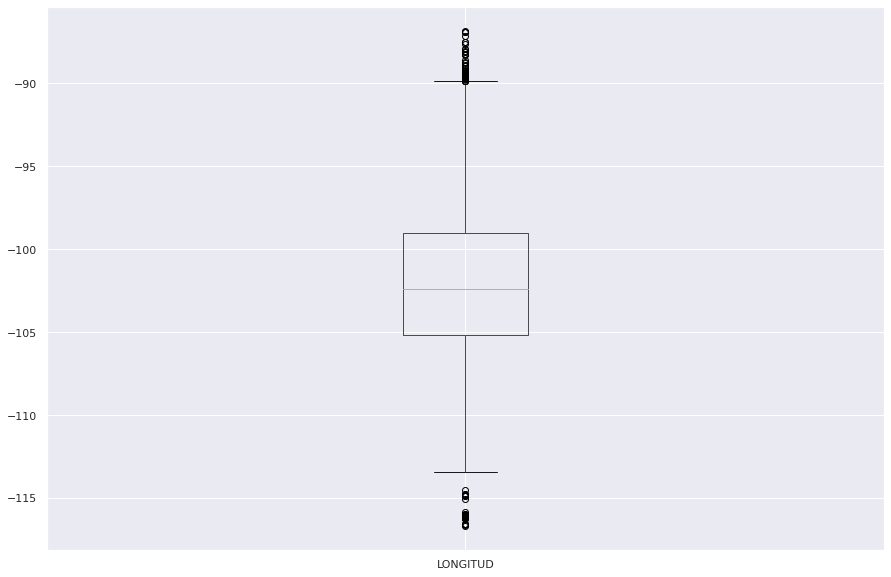

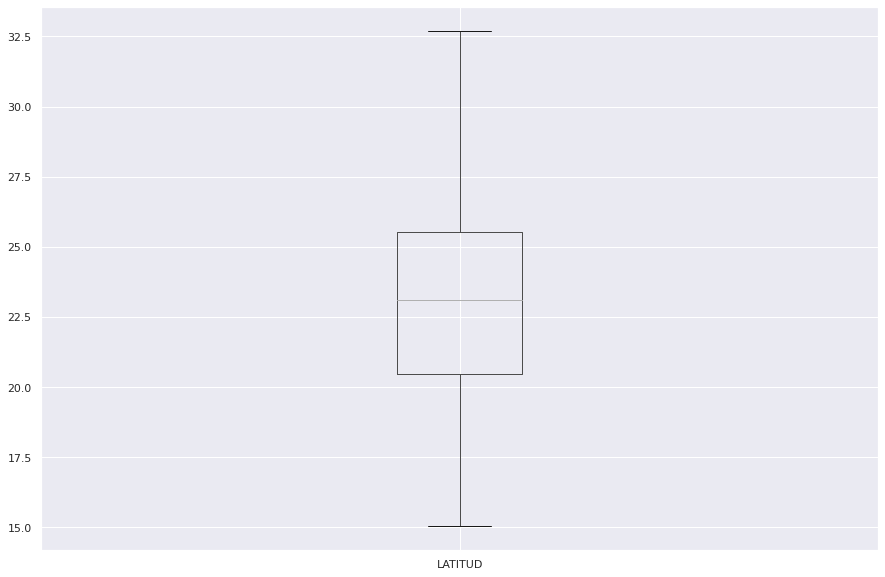

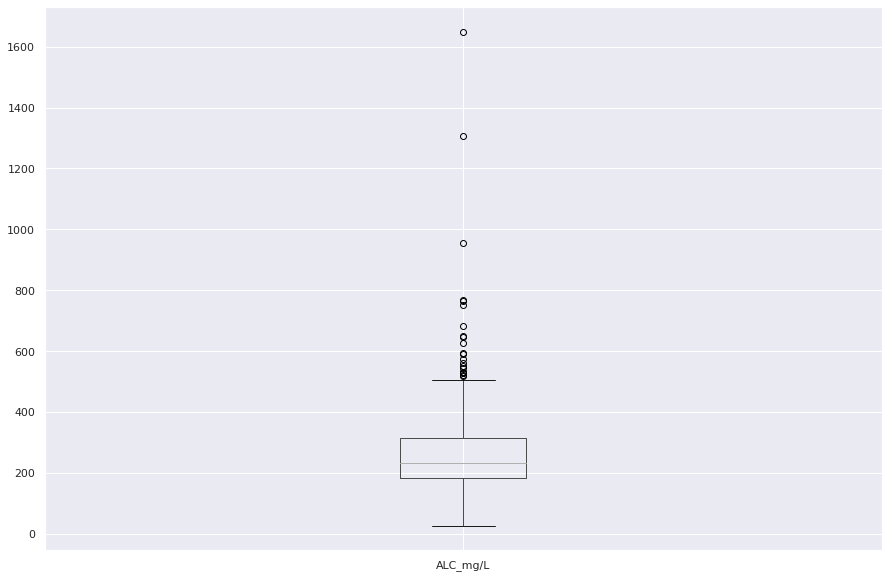

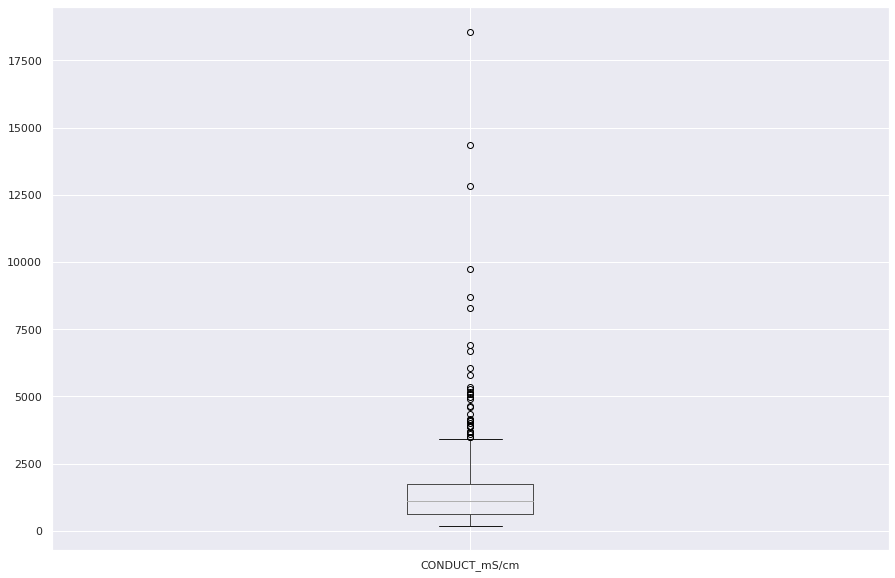

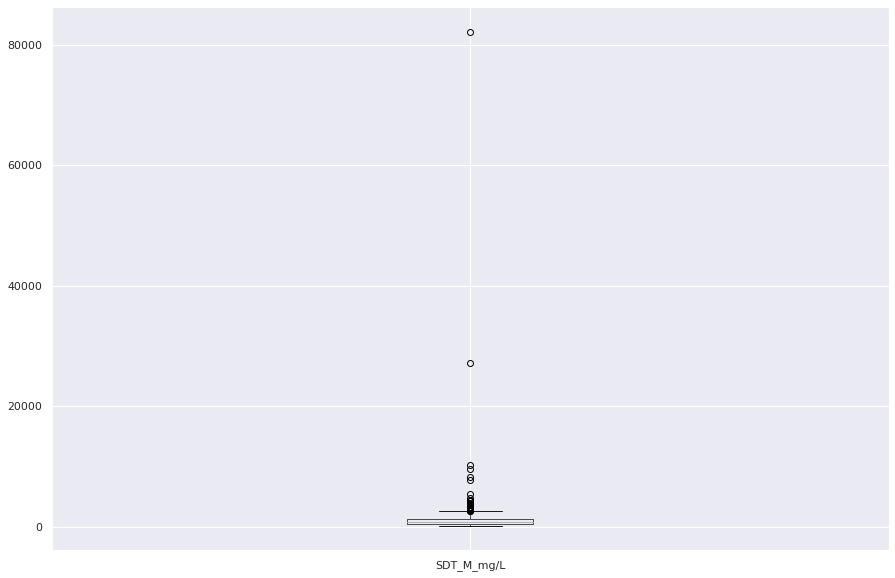

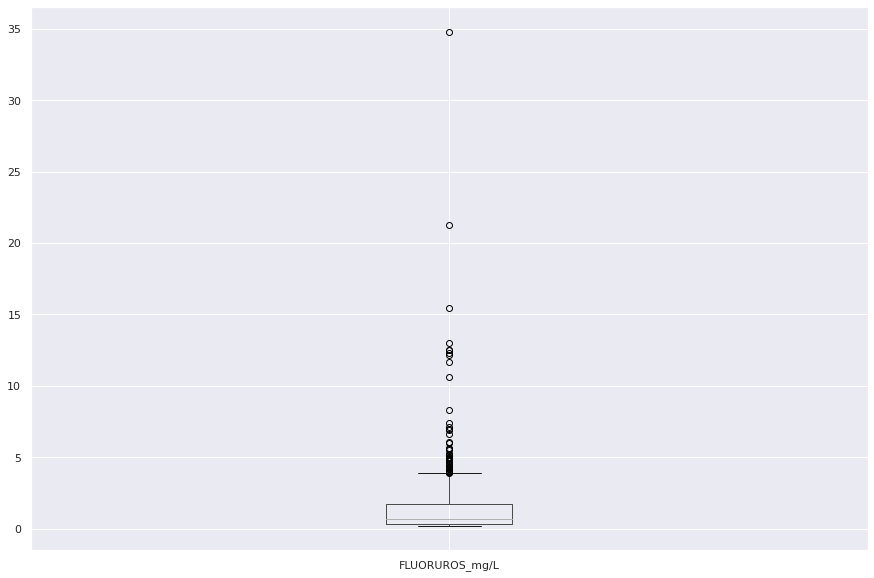

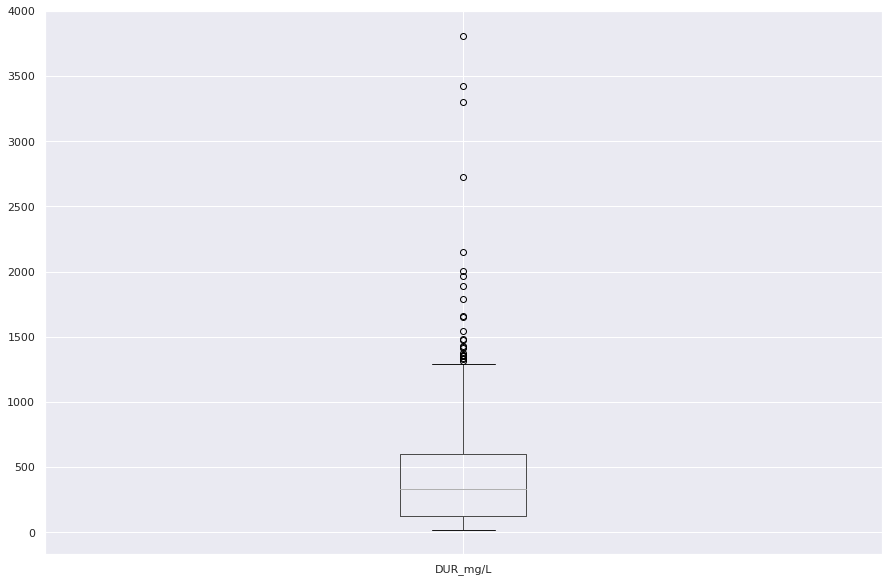

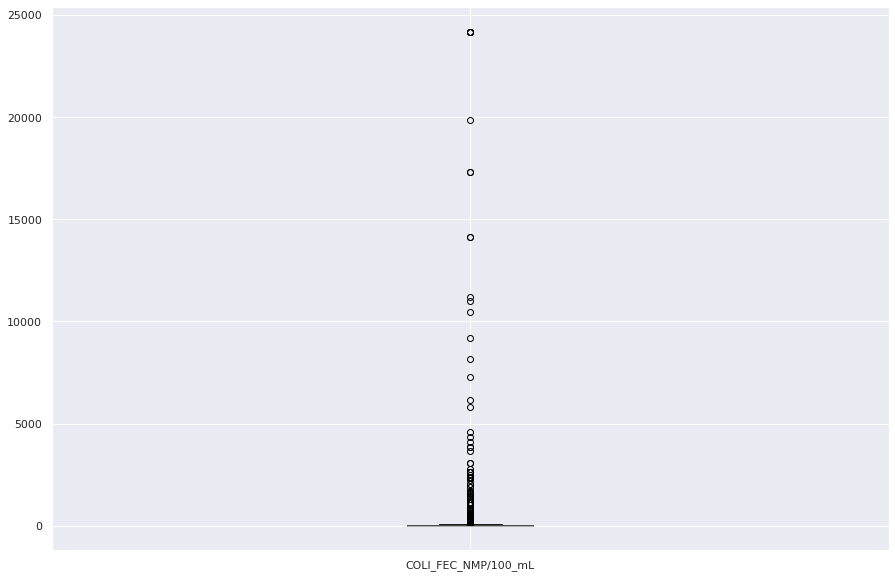

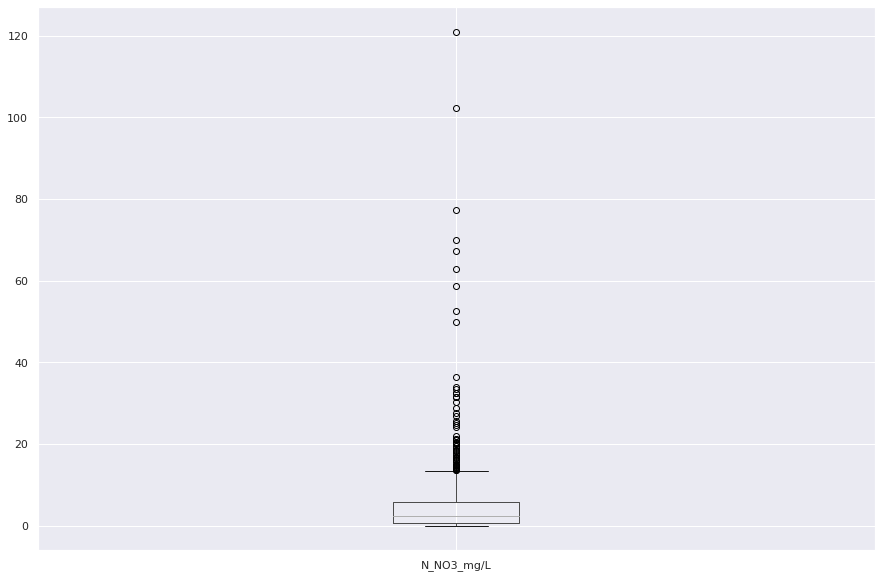

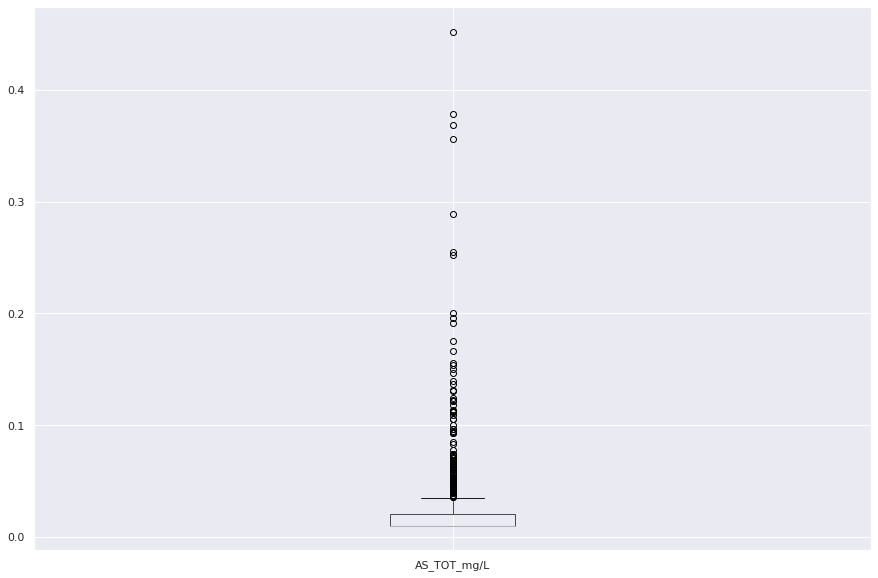

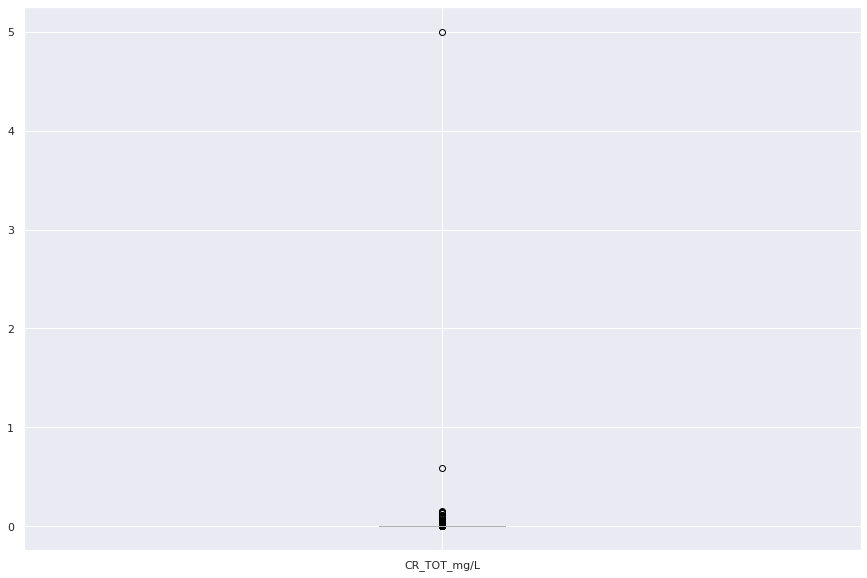

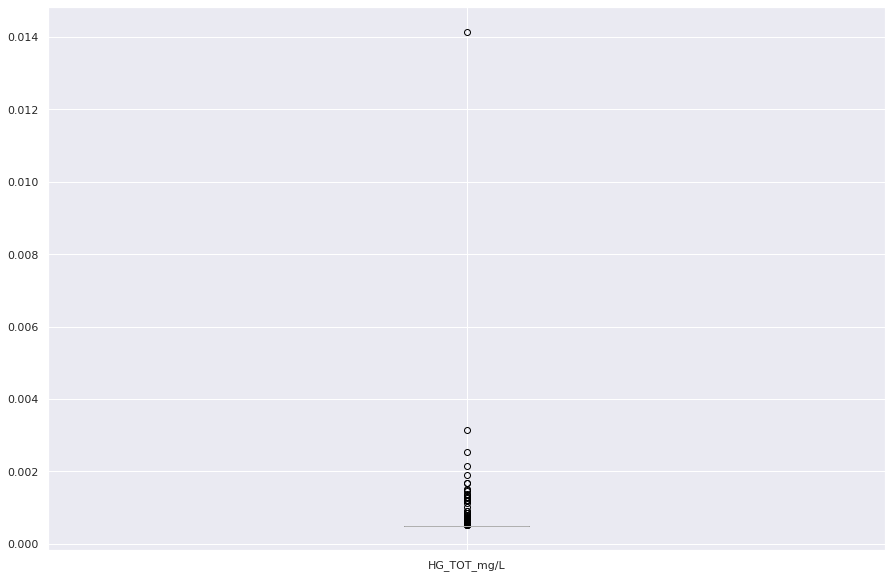

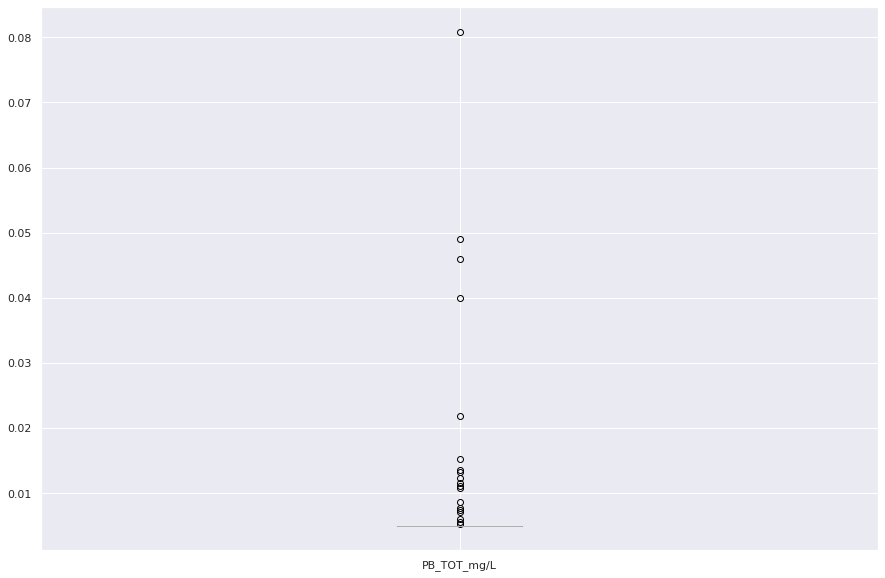

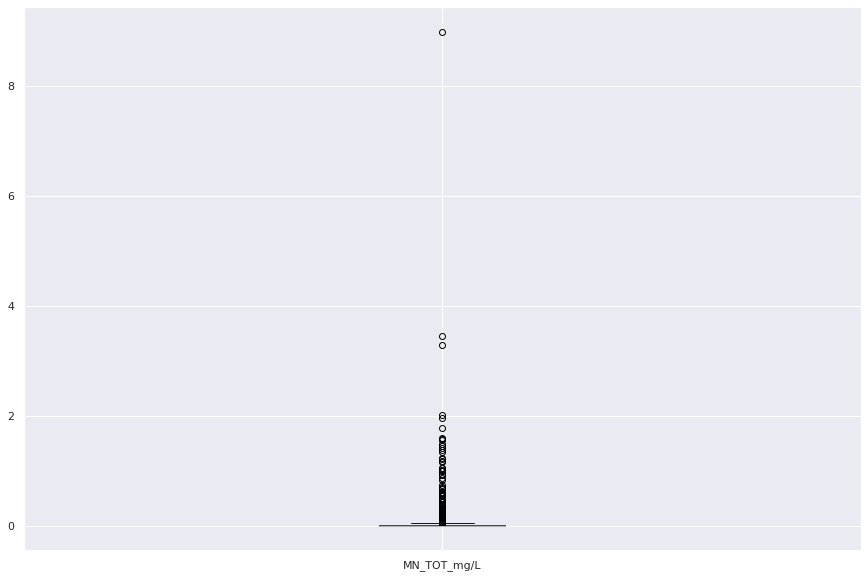

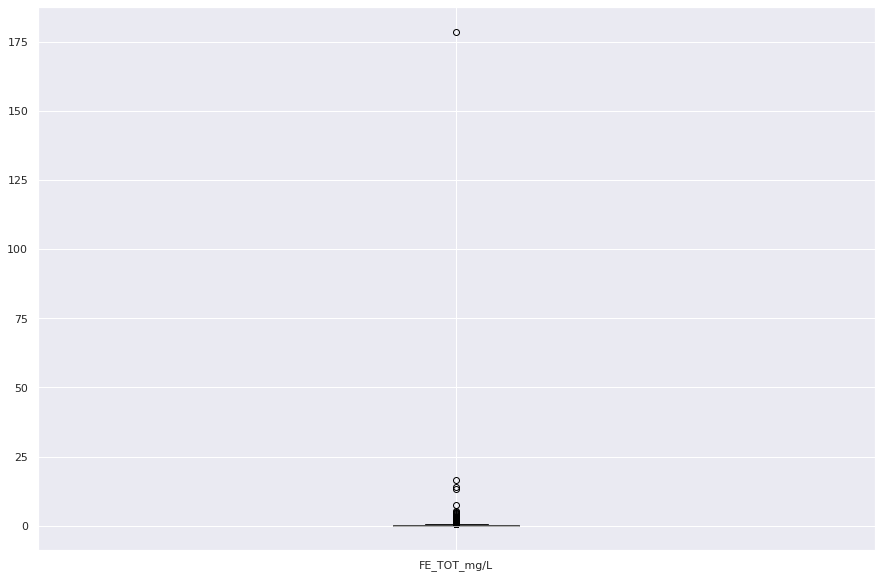

In [ ]:
import matplotlib.pyplot as plt

for column in nudf:
    plt.figure()
    df.boxplot([column])


# Realizar análisis para encontrar si existe una relación entre la calidad del agua y su ubicación geográfica a través de K- means

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
normalized = scaler.fit_transform(nudf)
nudf_norm = pd.DataFrame(normalized, columns=nudf.columns)
nudf_norm

,LONGITUD,LATITUD,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
0,-0.019843,-0.247080,-0.050714,-0.161286,-0.106614,-0.052915,-0.374146,-0.173004,-0.015306,-0.100815,-0.053615,-0.121847,-0.086726,-0.188883,-0.058023
1,-0.046466,-0.300931,-0.033577,-0.428308,-0.164085,-0.077209,-0.453847,-0.173004,0.172310,-0.177402,-0.053615,-0.121847,-0.086726,-0.188883,-0.069582
2,-0.059470,-0.206431,-0.265518,-0.489434,-0.201647,0.376855,-0.632623,-0.173004,-0.343072,0.492025,-0.053615,-0.121847,-0.086726,-0.188883,-0.069582
3,-0.060435,-0.253389,0.780485,-0.365574,-0.152024,0.023031,-0.412642,-0.173004,-0.365988,-0.120671,-0.053615,-0.121847,-0.086726,-0.188883,-0.069582
4,-1.245222,0.072624,0.633841,0.563374,0.102415,-0.438248,0.357423,-0.031951,1.361457,-0.273845,-0.053615,-0.121847,-0.086726,-0.188883,-0.069582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059,0.349765,0.409431,-0.041674,0.972754,0.235665,-0.456054,1.121932,-0.173004,1.234807,-0.273845,-0.053615,-0.121847,-0.086726,-0.188883,-0.069582
1060,0.326058,0.415205,0.172145,-0.491847,-0.217995,-0.456054,-0.209444,-0.173004,8.758436,-0.273845,-0.053615,-0.121847,-0.086726,-0.174056,-0.060425
1061,0.307952,0.613117,0.812102,1.173825,0.354529,-0.166703,0.866594,0.128126,3.854874,-0.273845,-0.053615,-0.121847,-0.086726,-0.128675,-0.035700
1062,0.232793,0.419934,-0.366451,-0.215173,-0.074985,-0.190893,0.161177,-0.173004,-0.514431,-0.273845,-0.053615,-0.121847,-0.086726,-0.161033,-0.041885


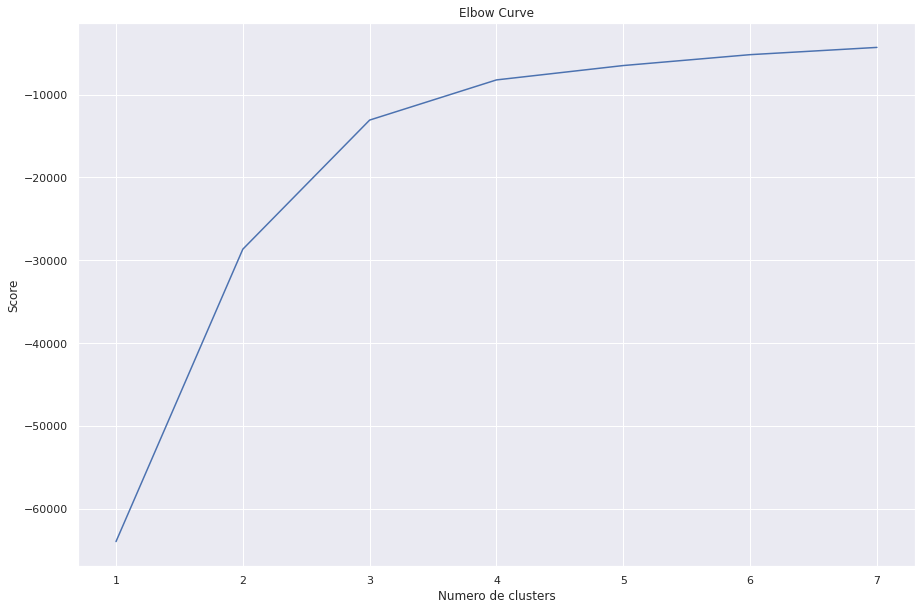

In [20]:
latlong=df[['LONGITUD','LATITUD']]
from sklearn.cluster import KMeans
Nclu= range(1, 8)
kmeans = [KMeans(n_clusters=i) for i in Nclu]
kmeans
score = [kmeans[i].fit(latlong).score(latlong) for i in range(len(kmeans))]
score
plt.plot(Nclu,score)
plt.xlabel('Numero de clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

# Mostrar resultados de agrupamiento de latitudes y longitudes con K means en el mapa de México

In [18]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.7 MB 27.0 MB/s 
     |████████████████████████████████| 1.0 MB 40.0 MB/s 
     |████████████████████████████████| 1.7 MB 50.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 179 kB 71.2 MB/s 
     |████████████████████████████████| 6.3 MB 51.1 MB/s 
  Created wheel for qeds: filename=qeds-0.7.0-py3-none-any.whl size=27812 sha256=5b4f2a6470a588b40646816686f5fde7729ea20a268d80b2ee7a613de4b2e740
  Stored in directory: /root/.cache/pip/wheels/fc/8c/52/0cc036b9730b75850b9845770780f8d05ed08ff38a67cbaa29
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=efb7f0c07b6f37e12b8e28ae54ffd7fcad1d3bdd19d8a117bc72a3c34676e59d
  Stored in directory: /root/

In [19]:
latlong.describe()

,LONGITUD,LATITUD
count,1064.000000,1064.000000
mean,-101.888948,23.169131
std,6.713487,3.888265
min,-116.664250,14.561150
25%,-105.394575,20.221577
50%,-102.173075,22.617190
75%,-98.974716,25.510285
max,-86.864120,32.677713


In [21]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

In [22]:
colordf=ndf[['LONGITUD','LATITUD','ALC_mg/L','CONDUCT_mS/cm','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL'
,'N_NO3_mg/L','AS_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L',
        'PB_TOT_mg/L', 'MN_TOT_mg/L','FE_TOT_mg/L','SEMAFORO'] ]

In [23]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()
world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

In [24]:
colordf["Coordinates"] = list(zip(colordf.LONGITUD, nudf.LATITUD))
colordf["Coordinates"] = colordf["Coordinates"].apply(Point)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [25]:
gdf = gpd.GeoDataFrame(colordf, geometry="Coordinates")
gdf.head()

,LONGITUD,LATITUD,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L,SEMAFORO,Coordinates
0,-102.02210,22.20887,229.990,940.0,603.6,0.9766,213.7320,1.1,4.184656,0.0161,0.005,0.0005,0.005,0.0015,0.0891,Verde,POINT (-102.02210 22.20887)
1,-102.20075,21.99958,231.990,608.0,445.4,0.9298,185.0514,1.1,5.750110,0.0134,0.005,0.0005,0.005,0.0015,0.0250,Verde,POINT (-102.20075 21.99958)
2,-102.28801,22.36685,204.920,532.0,342.0,1.8045,120.7190,1.1,1.449803,0.0370,0.005,0.0005,0.005,0.0015,0.0250,Rojo,POINT (-102.28801 22.36685)
3,-102.29449,22.18435,327.000,686.0,478.6,1.1229,199.8790,1.1,1.258597,0.0154,0.005,0.0005,0.005,0.0015,0.0250,Verde,POINT (-102.29449 22.18435)
4,-110.24480,23.45138,309.885,1841.0,1179.0,0.2343,476.9872,291.0,15.672251,0.0100,0.005,0.0005,0.005,0.0015,0.0250,Rojo,POINT (-110.24480 23.45138)


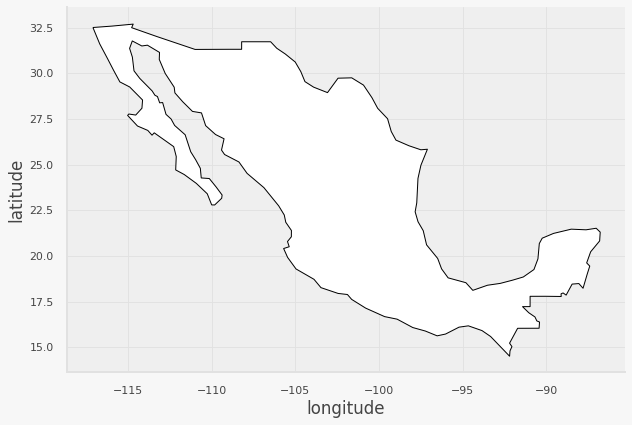

In [26]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

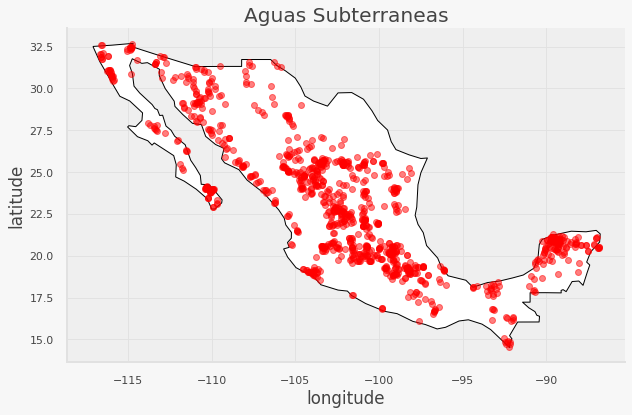

In [27]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Aguas Subterraneas')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

In [28]:
colordf['SEMAFORO'].value_counts()

Verde       432
Rojo        386
Amarillo    246
Name: SEMAFORO, dtype: int64

In [29]:
colordf['SEMAFORO'].replace('Verde', 2, inplace=True)
colordf['SEMAFORO'].replace('Rojo', 1, inplace=True)
colordf['SEMAFORO'].replace('Amarillo', 0, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [31]:
kmeans = KMeans(n_clusters=4).fit(latlong)
centroids = kmeans.cluster_centers_
centroids = pd.DataFrame(centroids, columns=['LATITUD', 'LONGITUD'])
print(centroids)

      LATITUD   LONGITUD
0  -90.092716  19.650263
1 -103.663326  24.772999
2 -111.445371  28.734017
3 -100.225558  20.271399


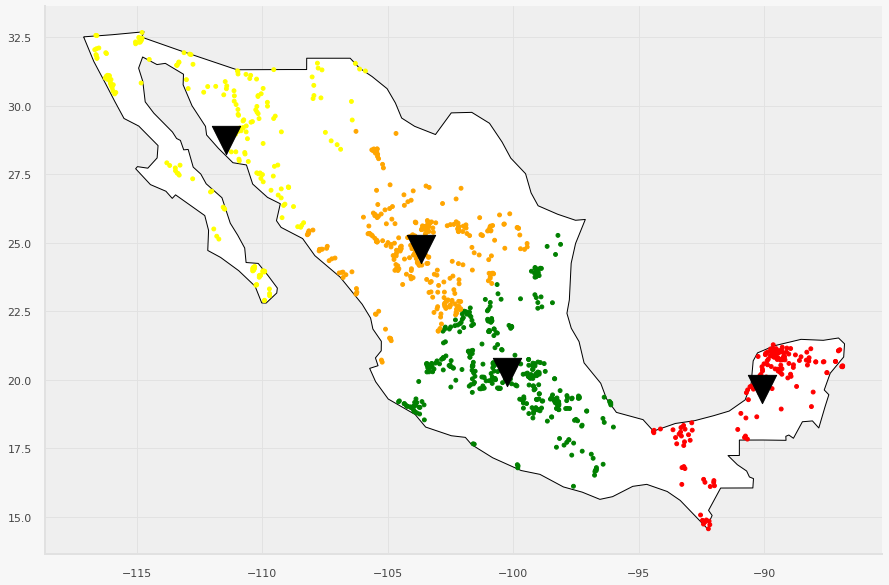

In [32]:
labels = kmeans.predict(latlong)
colores=['red','orange','yellow','green']
asignar=[]
for row in labels:
    asignar.append(colores[row])
fig, ax= plt.subplots(figsize=(15,15))
world.query("name == 'Mexico'").plot(ax = ax, edgecolor='black', color='white') 
ax.scatter( latlong["LONGITUD"],latlong["LATITUD"], c=asignar,s=15) 
ax.scatter(centroids["LATITUD"],centroids["LONGITUD"], marker='v', c='black', s=800)

In [34]:

dfVerdes=colordf.loc[colordf['SEMAFORO']==2]
latlongV=dfVerdes[["LATITUD","LONGITUD"]]

dfRojos=colordf.loc[colordf['SEMAFORO']==1]
latlongR=dfRojos[["LATITUD","LONGITUD"]]
latlongR
dfAmarillos=colordf.loc[colordf['SEMAFORO']==0]
latlongA=dfAmarillos[["LATITUD","LONGITUD"]] 

dfV=pd.DataFrame()
dfV["Coordinates"] = list(zip(dfVerdes.LONGITUD, dfVerdes.LATITUD))
dfV["Coordinates"] = dfV["Coordinates"].apply(Point)
gdfV = gpd.GeoDataFrame(dfV, geometry="Coordinates")

dfR=pd.DataFrame()
dfR["Coordinates"] = list(zip(dfRojos.LONGITUD, dfRojos.LATITUD))
dfR["Coordinates"] = dfR["Coordinates"].apply(Point)
gdfR = gpd.GeoDataFrame(dfR, geometry="Coordinates")

dfA=pd.DataFrame()
dfA["Coordinates"] = list(zip(dfAmarillos.LONGITUD, dfAmarillos.LATITUD))
dfA["Coordinates"] = dfA["Coordinates"].apply(Point)
gdfA = gpd.GeoDataFrame(dfA, geometry="Coordinates")


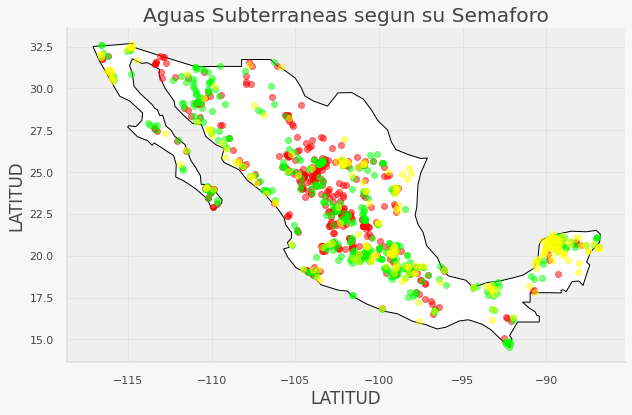

In [35]:
fig, gax = plt.subplots(figsize=(10,10))


world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')


gdfR.plot(ax=gax, color='Red', alpha = .5)
gdfV.plot(ax=gax, color='Lime', alpha = .5)
gdfA.plot(ax=gax, color='Yellow', alpha = .5)

gax.set_xlabel('LATITUD')
gax.set_ylabel('LATITUD')
gax.set_title('Aguas Subterraneas segun su Semaforo')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

####  Reto-> Entrega 2 (18/11)

In [154]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score         
from sklearn.metrics import classification_report, make_scorer

* Selecciona tus variables independientes X y dependiente Y (semáforo)
* Cambia a label encoding el semáforo, ej, de ["clase 1", "clase 2", "clase 3"] a [ 1,2,3]
* Realiza un análisis general de las features importances a traves de decision trees o random forest.
* Selecciona las variables de mayor importancia.
* Realiza tu clasificador, recuerda dividir los datos de manera balanceada (auxiliate de train test split)
* Explora que clasificador es el más optimo, ejemplo:
1. Decision trees
2. Random Forest.
*Determina el grado de exactitud a través del reporte de clasificación https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html Links to an external site..
* Visualiza los resultados del modelo o las predicciones a través de una matriz de confusión.

1. Selecciona tus variables independientes X y dependiente Y (semáforo)

In [117]:
ndf['SEMAFORO'].replace('Verde', 2, inplace=True)
ndf['SEMAFORO'].replace('Rojo', 1, inplace=True)
ndf['SEMAFORO'].replace('Amarillo', 0, inplace=True)

In [161]:
x=ndf[['ALC_mg/L','CONDUCT_mS/cm','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL'
            ,'N_NO3_mg/L','AS_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L', 'MN_TOT_mg/L','FE_TOT_mg/L'] ]

y=ndf['SEMAFORO']

In [162]:
unique, counts = np.unique(y, return_counts=True)
print(np.asarray((unique, counts)).T)

[[  1 386]
 [  2 246]
 [  3 432]]


In [163]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify= y)

unique, counts = np.unique(y_train, return_counts=True)
print(np.asarray((unique, counts)).T)

[[  1 309]
 [  2 197]
 [  3 345]]


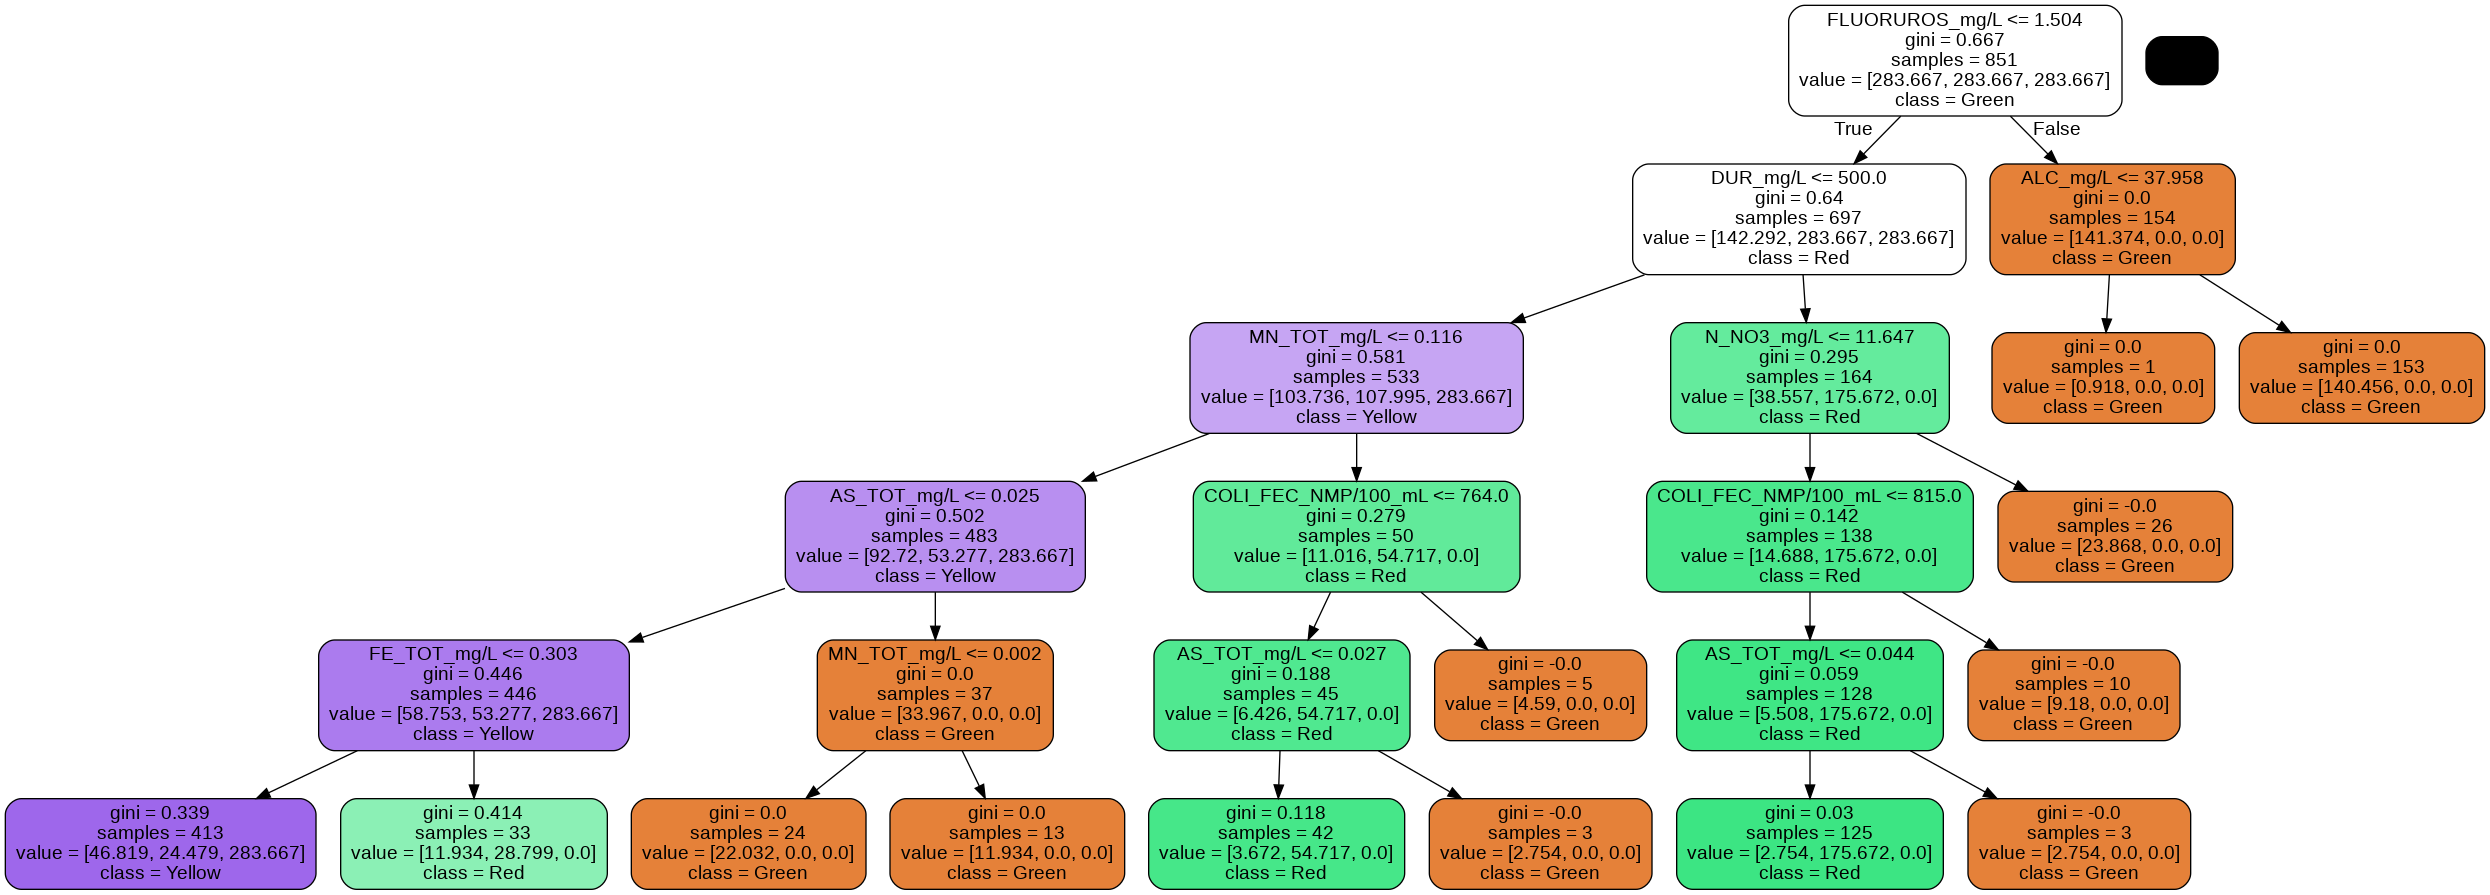

In [164]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.tree import export_graphviz

dtc = tree.DecisionTreeClassifier(max_depth=5, class_weight='balanced')
dtc = dtc.fit(x_train, y_train)
arbol= export_graphviz (dtc,
                        out_file = None,
                        feature_names= x_train.columns,
                        class_names = ['Green','Red','Yellow'],
                        rounded = True,
                        filled = True)
import pydotplus
from IPython.display import Image

graph = pydotplus.graph_from_dot_data(arbol)
graph.write_png('dtc.png')
Image(filename = 'dtc.png')

In [165]:
y_pred = dtc.predict(x_test)

from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)
print('Matriz de confusión\n')
print(confusion)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Class 1', 'Class 2', 'Class 3',]))

Matriz de confusión

[[50  6 21]
 [ 0 43  6]
 [ 0  1 86]]

Accuracy: 0.84

Micro Precision: 0.84
Micro Recall: 0.84
Micro F1-score: 0.84

Macro Precision: 0.87
Macro Recall: 0.84
Macro F1-score: 0.84

Weighted Precision: 0.87
Weighted Recall: 0.84
Weighted F1-score: 0.84

Classification Report

              precision    recall  f1-score   support

     Class 1       1.00      0.65      0.79        77
     Class 2       0.86      0.88      0.87        49
     Class 3       0.76      0.99      0.86        87

    accuracy                           0.84       213
   macro avg       0.87      0.84      0.84       213
weighted avg       0.87      0.84      0.84       213



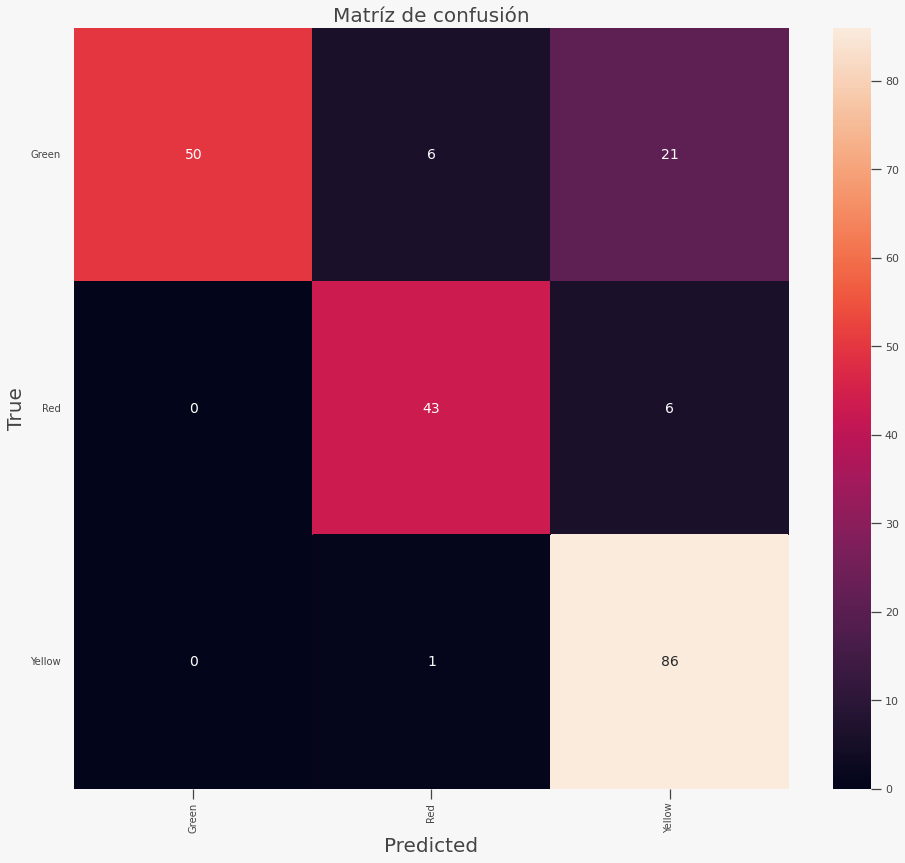

In [166]:
fig = plt.figure(figsize=(16, 14))
ax= plt.subplot()
sns.heatmap(confusion, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells

ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(['Green','Red','Yellow'], fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(['Green','Red','Yellow'], fontsize = 10)
plt.yticks(rotation=0)

plt.title('Matríz de confusión', fontsize=20)

plt.savefig('ConMat24.png')
plt.show()

RandomForestClassifier(class_weight='balanced', max_depth=4)


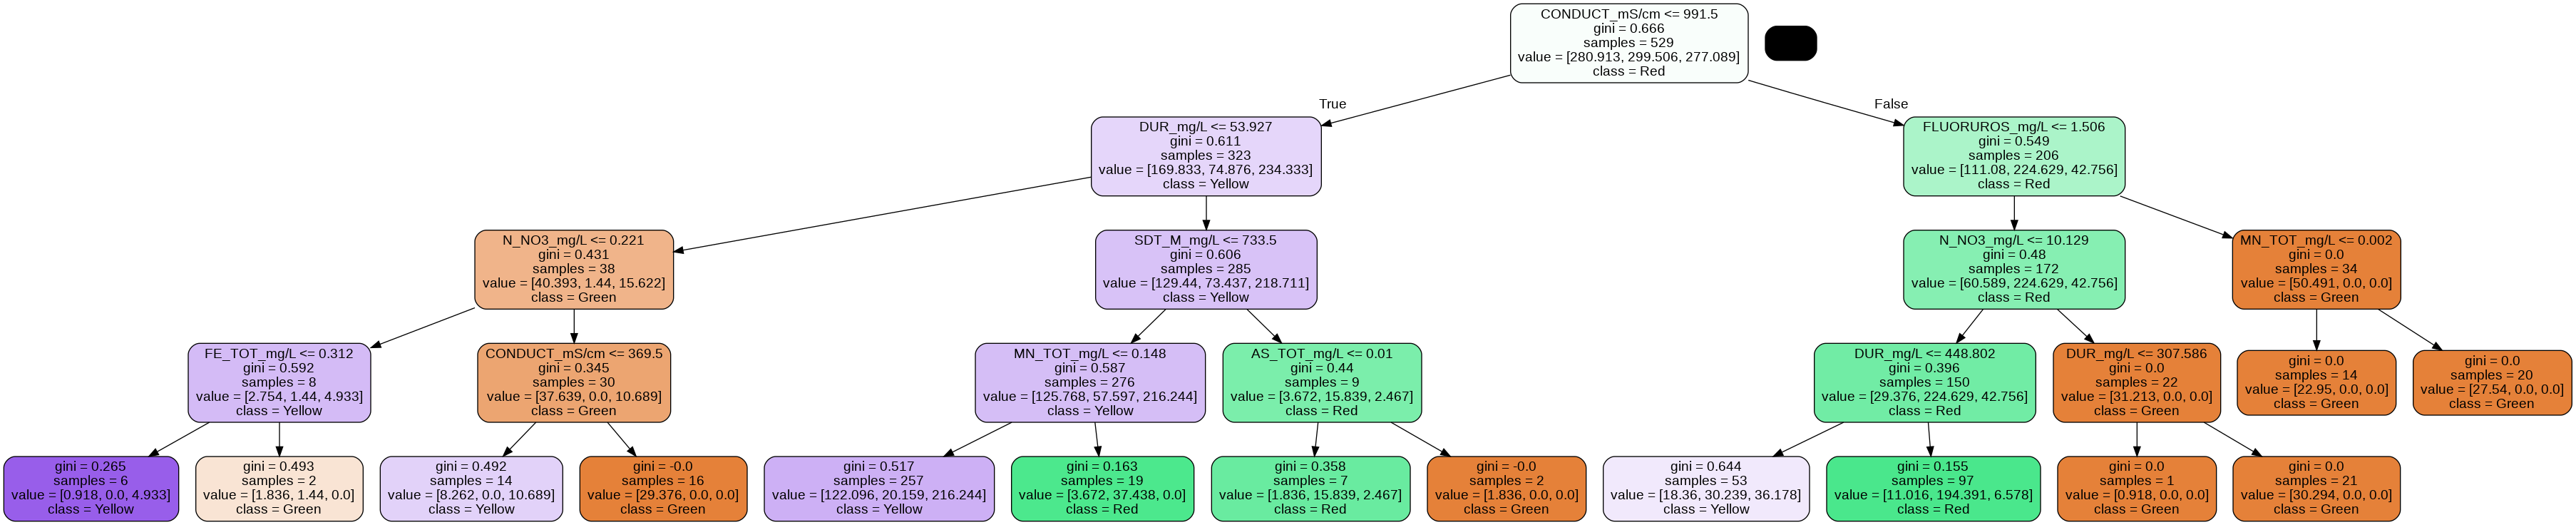

In [186]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import pydotplus
from IPython.display import Image

rf = RandomForestClassifier(max_depth=4, class_weight='balanced') 
rf = rf.fit(x_train, y_train)
print(rf)
rf = rf[1]
arbol= export_graphviz (rf,
                        out_file = None,
                        feature_names= x_train.columns,
                        class_names = ['Green','Red','Yellow'],
                        rounded = True,
                        filled = True)




graph = pydotplus.graph_from_dot_data(arbol)
graph.write_png('rf.png')
Image(filename = 'rf.png')

In [187]:
y_pred = rf.predict(x_test)

from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)
print('Matriz de confusión\n')
print(confusion)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Class 1', 'Class 2', 'Class 3','Class 4']))

Matriz de confusión

[[ 0  0  0  0]
 [28 11 38  0]
 [ 0 38 11  0]
 [ 0  3 84  0]]

Accuracy: 0.10

Micro Precision: 0.10
Micro Recall: 0.10
Micro F1-score: 0.10

Macro Precision: 0.07
Macro Recall: 0.09
Macro F1-score: 0.07

Weighted Precision: 0.10
Weighted Recall: 0.10
Weighted F1-score: 0.09

Classification Report

              precision    recall  f1-score   support

     Class 1       0.00      0.00      0.00         0
     Class 2       0.21      0.14      0.17        77
     Class 3       0.08      0.22      0.12        49
     Class 4       0.00      0.00      0.00        87

    accuracy                           0.10       213
   macro avg       0.07      0.09      0.07       213
weighted avg       0.10      0.10      0.09       213



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted sampl

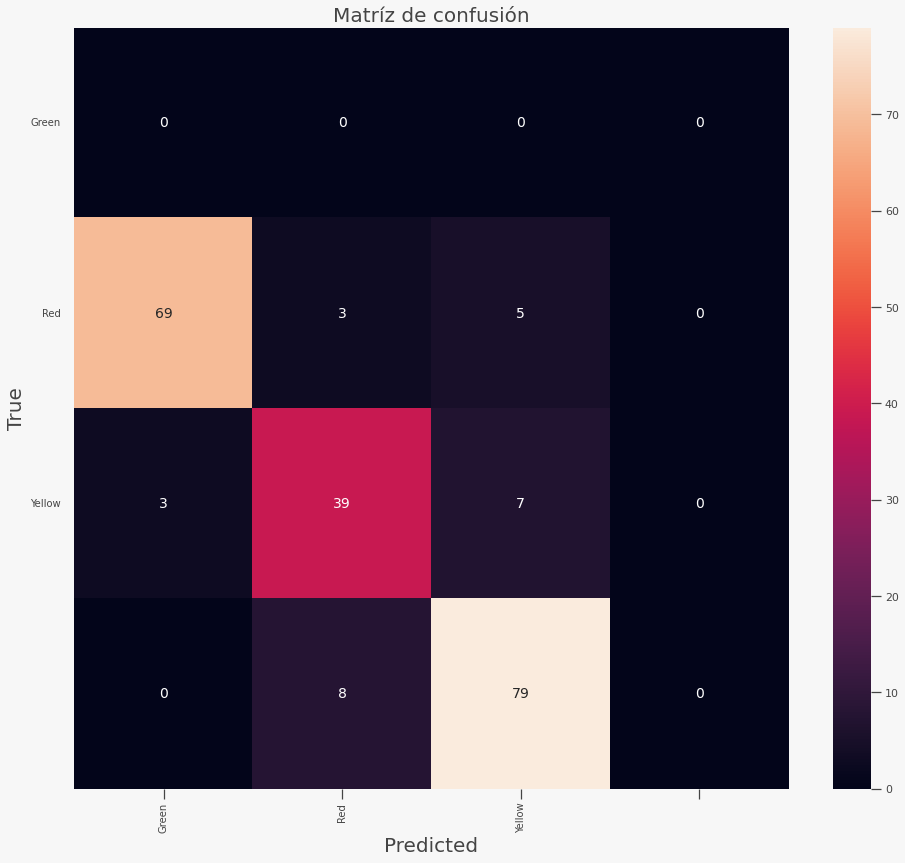

In [175]:
fig = plt.figure(figsize=(16, 14))
ax= plt.subplot()
sns.heatmap(confusion, annot=True, ax = ax, fmt = 'g'); 

ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(['Green','Red','Yellow'], fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(['Green','Red','Yellow'], fontsize = 10)
plt.yticks(rotation=0)

plt.title('Matríz de confusión', fontsize=20)

plt.savefig('ConMat24.png')
plt.show()



In [188]:
def plot_feature_importance(importance,names,model_type):

    feature_importance = np.array(importance)
    feature_names = np.array(names)
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    plt.figure(figsize=(10,8))
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

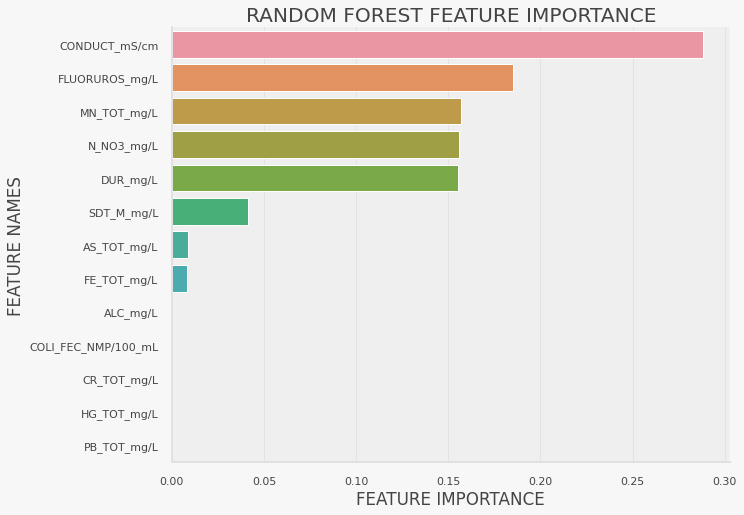

In [189]:
plot_feature_importance(rf.feature_importances_,x_train.columns,'RANDOM FOREST')


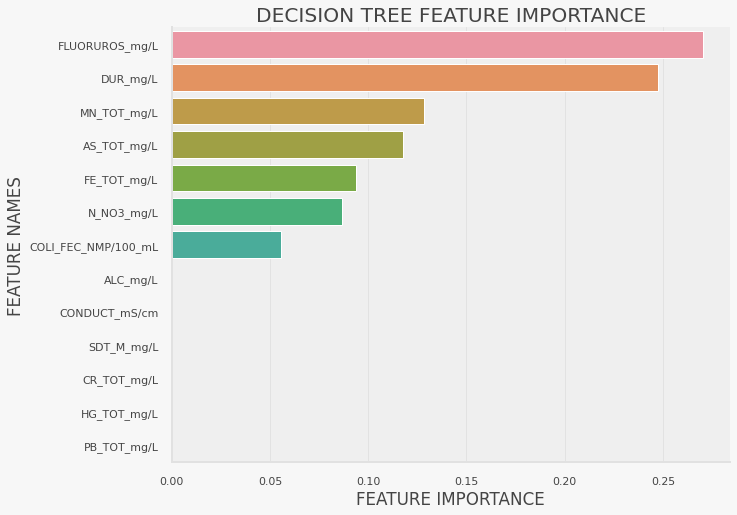

In [190]:
plot_feature_importance(dtc.feature_importances_,x_train.columns,'DECISION TREE')